In [1]:
from scipy.integrate import odeint
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Examen 3
## 1. 
Considere una matrix $A$, $3\times 3$ real, que se pueda diagonalizar con una transformación del  tipo
\begin{align}
  A_{\text{diag}}=P^T\cdot A \cdot U\,,
\end{align}
donde $P$ es una matrix de permutación ortogonal, es decir, de entradas 0 y $\pm 1$, y $U$ es una matriz de rotación en términos de tres ángulos de mezcla: $\theta_{12}$, $\theta_{23}$, $\theta_{13}$
\begin{align*}                                                                  
U=\begin{bmatrix}                                                                 
c_{12}c_{13}                    &s_{12}c_{13}                & s_{13}  \\       
-s_{12}c_{23}-c_{12}s_{23}s_{13}  & c_{12}c_{23}-s_{12}s_{23}s_{13}& s_{23}c_{13}\\                            s_{12}s_{23}-c_{12}c_{23}s_{13}  &-c_{12}s_{23}-s_{12}c_{23}s_{13}& c_{23}c_{13}\\ 
\end{bmatrix}                                                                   
\end{align*}
donde $c_{12}=\cos\theta_{12}$, etc. Construya una función de python, que acepte como entrada una matrix, y entrege como salida los tres autovectores ordenados de mayor a menor y los tres ángulos de mezcla en grados.  Aplique dicha función sobre la matrix:
```
A=np.array( [
 [7.778162746217654799e+00, -7.662363998929994757e+00,  1.337296616780795588e+00],
 [2.121317112604814703e+00,  2.088449805848296759e+00, -3.720095646918017973e-01],
 [6.981313463593235256e-03,  6.945916527427932197e-01,  3.939225012258420922e+00]] )
```

In [2]:
A=np.array( [
[7.778162746217654799e+00, -7.662363998929994757e+00,  1.337296616780795588e+00],
[2.121317112604814703e+00,  2.088449805848296759e+00, -3.720095646918017973e-01],
[6.981313463593235256e-03,  6.945916527427932197e-01,  3.939225012258420922e+00]] )

In [3]:
λ1,PP= np.linalg.eig(np.dot(A,A.transpose())) #V 
λ2,UU= np.linalg.eig( np.dot(A.transpose(),A) ) #U
λ1,λ2 #Check if we need to reorder UU and PP

(array([ 121.,    9.,   16.]), array([ 121.,    9.,   16.]))

In [4]:
#Reorder
index=np.abs(λ2).argsort()[::-1]
U=np.hstack( [ np.reshape( UU[:,i], (3,1) ) for i in index   ] ) #Reorder U from high to low value
P=np.hstack( [ np.reshape( PP[:,i], (3,1) ) for i in index   ] ) #Reorder P as U

In [5]:
#Verify if the reorder was right
Adiag=np.dot(np.dot( P.transpose(),A),U).round(13)
Adiag

array([[ 11.,   0.,   0.],
       [  0.,   4.,  -0.],
       [  0.,  -0.,  -3.]])

In [6]:
# Unpack autovectors
U0=np.reshape( U[:,0],(3,1))
U1=np.reshape( U[:,1],(3,1))
U2=np.reshape(U[:,2],(3,1))

#Autovectors from high to low value
display(U0)
display(U1)
U2

array([[ 0.7071057 ],
       [-0.69657855],
       [ 0.12157242]])

array([[ 0.00174533],
       [ 0.17364791],
       [ 0.98480625]])

array([[-0.7071057 ],
       [-0.69614994],
       [ 0.12400319]])

In [9]:
s13=U[0,2] 

θ13= np.arcsin(s13)

c13=np.cos(θ13)
θ12=np.arccos(U[0,0]/c13)
θ23=np.arcsin(U[1,2]/c13)

angulosmezcla=(θ12,θ23,θ13)

print ('Los angulos mezcla θ12,θ23,θ13 en grados son: {}'.format(np.rad2deg(angulosmezcla)))

Los angulos mezcla θ12,θ23,θ13 en grados son: [  0.14142121 -79.90000015 -44.99991273]


## 2.
Grafique el espacio de configuración elongación-velocidad, de una masa $m=1\ $Kg  en el extremo de un resorte de constante elástica $k=1\ $N/m sometida a una fuerza de fricción proporcional a velocidad con coeficiente de fricción $b=1/3\ $N$\cdot$s/m. Considere elongaciónes iniciales en el intervalo $-1\ $m a $1\ $m y velocidades iniciales entre $-1\ $m/s y $1\ $m/s

In [21]:
#Make initial conditions arrays
x0s = -1 + np.random.random(100)*2
v0s = -1 + np.random.random(100)*2

#Define system Parameters
k = 1          # 
m = 1          # 
b= 1/3         # 
params=[k,m,b]

In [22]:
''' 
Desacople the second order Differential Equation in 
two first order Differential Equations
'''

def dU_dt(U, t,args=()):
    x, v = U   
    return [v, -k*x/m - b*v/m]

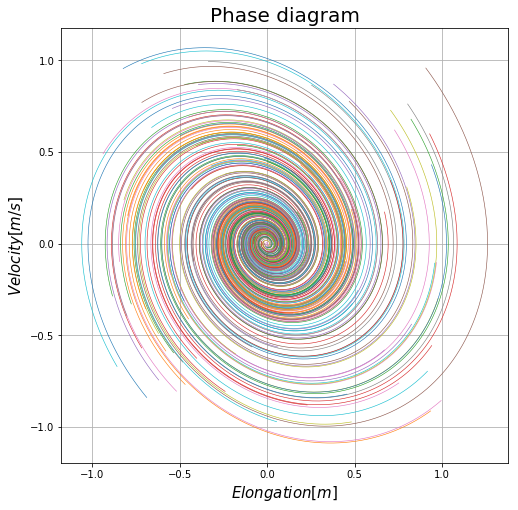

In [23]:

plt.figure( figsize = (8,8) )

for x0, v0 in zip(x0s, v0s):
    t=np.linspace(0,15,1000) # Make time array for solution
    icond=[x0,v0] #Define initial conditions
    Us=odeint(dU_dt,icond,t, args=(params,))#Solve the equation
    
    #plot phase diagram
    plt.plot(Us[:,0],Us[:,1],lw = 0.6)
    plt.xlabel('$Elongation [m]$', size=15)
    plt.ylabel('$Velocity [m/s]$', size=15)
    plt.title('Phase diagram', size=20)

plt.grid()